# Chain Rule (Правило цепочки)

## Формулировка

Если $y = f(u)$ и $u = g(x)$, то:

$$\boxed{\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx} = f'(g(x)) \cdot g'(x)}$$

Или в другой записи для композиции $y = f(g(x))$:

$$\boxed{(f \circ g)'(x) = f'(g(x)) \cdot g'(x)}$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import sympy as sp

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12


---

## 🎯 Геометрическая интуиция

### Идея: "Цепочка изменений"

Представь цепочку:

$$x \xrightarrow{\text{функция } g} u \xrightarrow{\text{функция } f} y$$

**Что происходит при изменении x?**

1. **Шаг 1:** Изменяем $x$ на малое $dx$
   - Это вызывает изменение $u$ на величину $du$
   - Коэффициент усиления: $\frac{du}{dx} = g'(x)$
   - Формула: $du = g'(x) \cdot dx$

2. **Шаг 2:** Изменение $u$ на $du$ вызывает изменение $y$ на $dy$
   - Коэффициент усиления: $\frac{dy}{du} = f'(u)$
   - Формула: $dy = f'(u) \cdot du$

3. **Общий эффект:** Подставим $du$ из шага 1 в шаг 2:
   $$dy = f'(u) \cdot du = f'(u) \cdot g'(x) \cdot dx$$
   
   Значит:
   $$\frac{dy}{dx} = f'(u) \cdot g'(x) = f'(g(x)) \cdot g'(x)$$

---

### 🚴 Физическая аналогия

**Задача:** Велосипедист едет в **2 раза** быстрее пешехода, а машина едет в **3 раза** быстрее велосипедиста. Во сколько раз машина быстрее пешехода?

**Ответ:** В **2 × 3 = 6** раз!

**Формально:**
- Пешеход: скорость = $v$
- Велосипед: скорость = $2v$ (коэффициент 2)
- Машина: скорость = $3 \cdot (2v) = 6v$ (коэффициенты перемножаются!)

**Chain rule — это то же самое:** скорости изменения перемножаются!


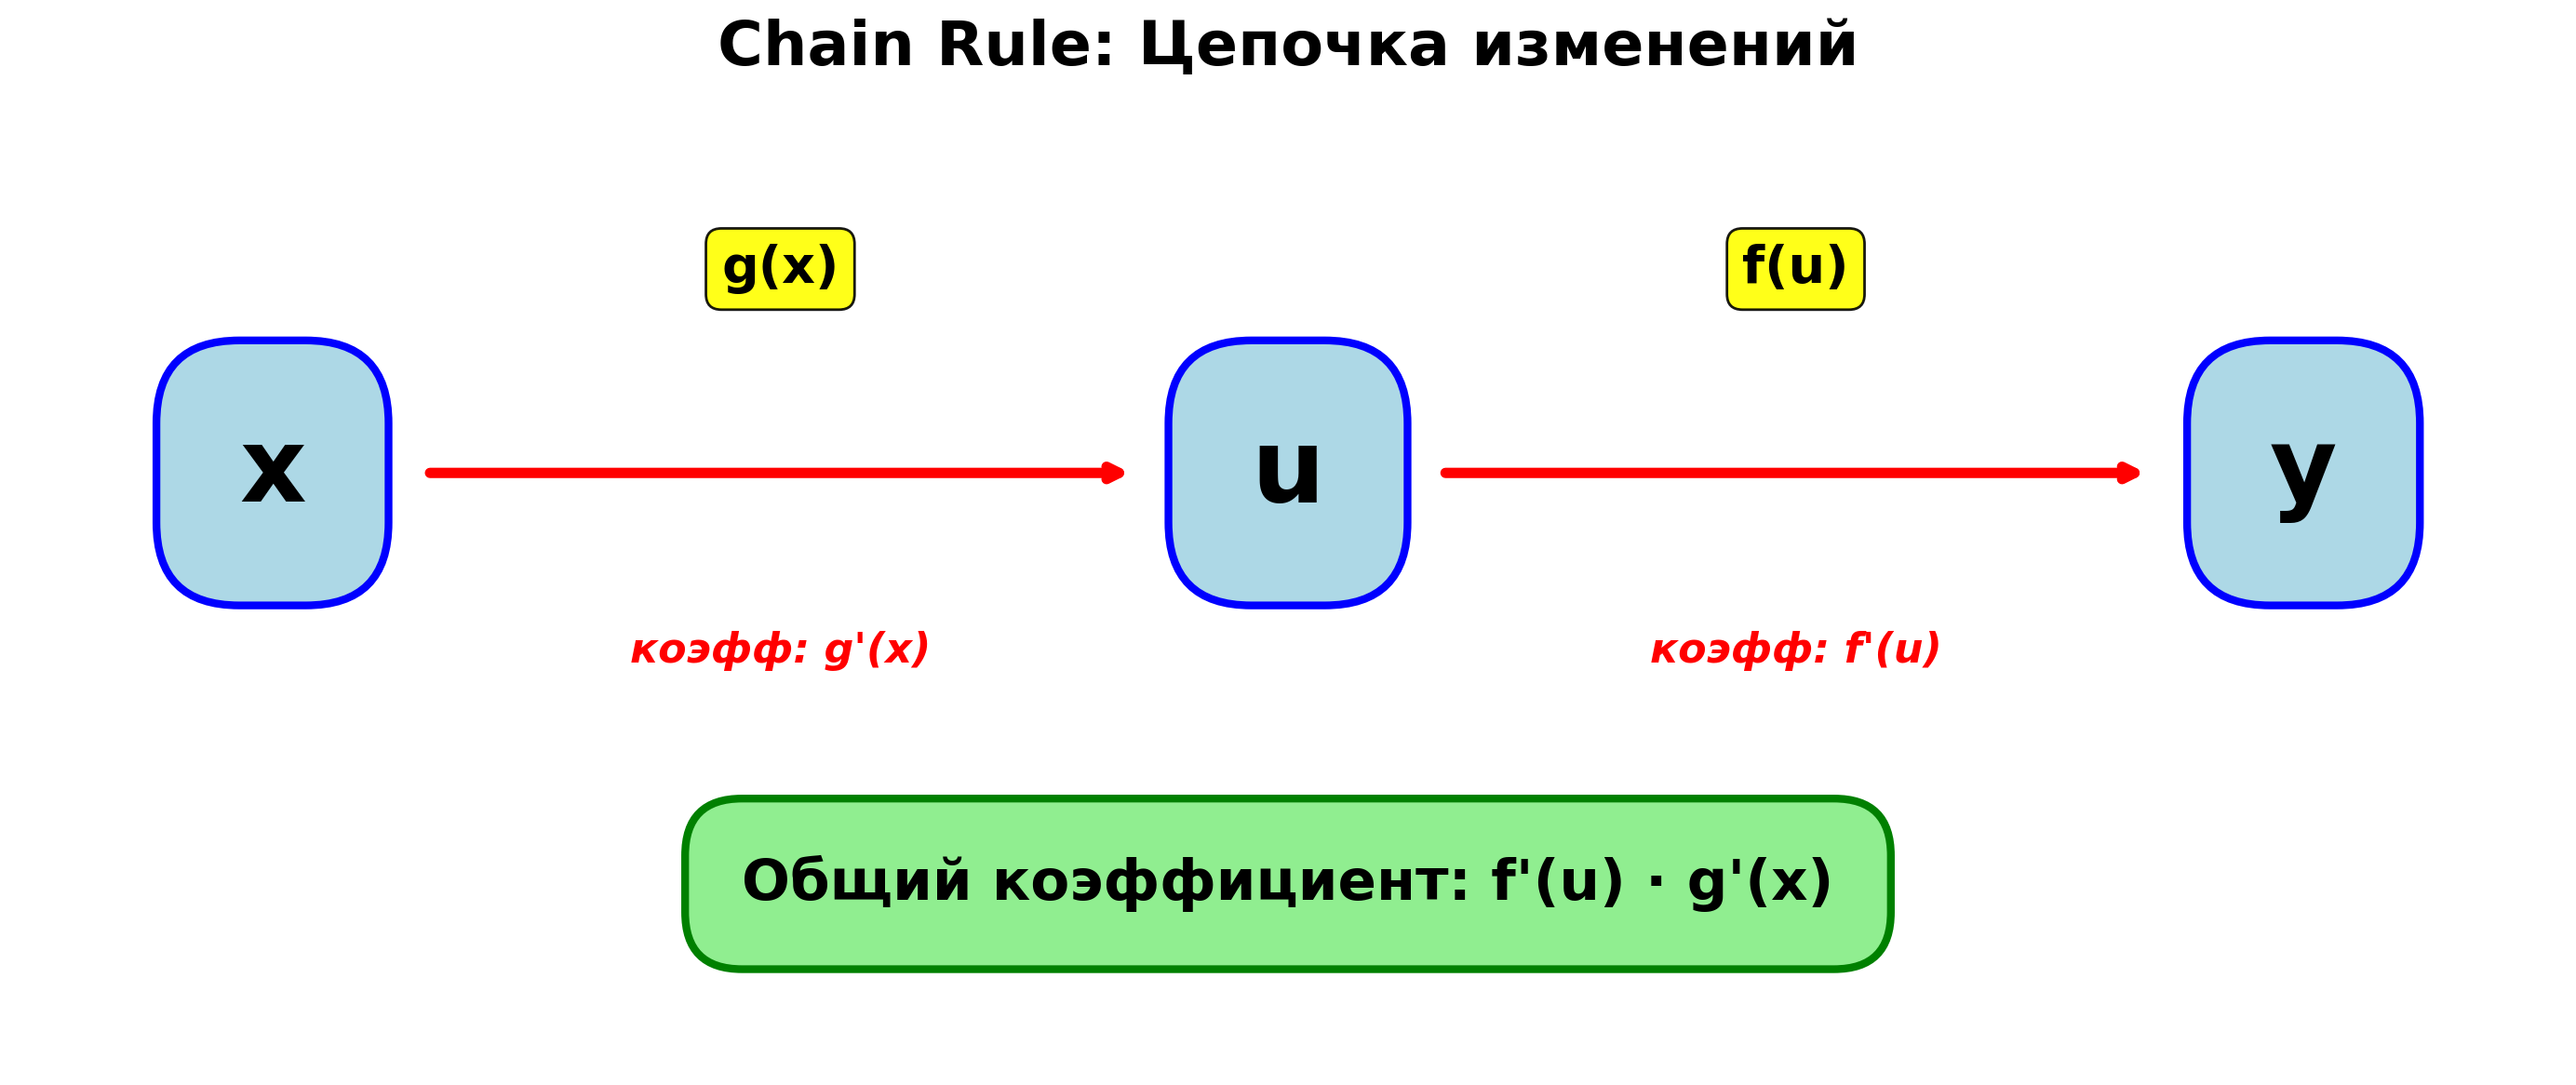

CHAIN RULE: Коэффициенты перемножаются!

  x изменяется → u изменяется в g'(x) раз быстрее
  u изменяется → y изменяется в f'(u) раз быстрее

  Итого: y изменяется в [f'(u) × g'(x)] раз быстрее чем x



In [2]:
# Визуализация цепочки изменений

fig, ax = plt.subplots(1, 1, figsize=(14, 6))

# Координаты для блоков
x_pos = [1, 5, 9]
y_pos = 2

# Блоки
box_props = dict(boxstyle='round,pad=0.8', facecolor='lightblue', edgecolor='blue', linewidth=3)
arrow_props = dict(arrowstyle='->', lw=4, color='red')

# x -> u
ax.text(x_pos[0], y_pos, 'x', fontsize=40, ha='center', va='center', 
        bbox=box_props, fontweight='bold')
ax.annotate('', xy=(x_pos[1]-0.6, y_pos), xytext=(x_pos[0]+0.6, y_pos),
            arrowprops=arrow_props)
ax.text((x_pos[0]+x_pos[1])/2, y_pos+0.8, "g(x)", fontsize=20, ha='center', 
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.9), fontweight='bold')
ax.text((x_pos[0]+x_pos[1])/2, y_pos-0.8, "коэфф: g'(x)", fontsize=16, ha='center',
        style='italic', color='red', fontweight='bold')

# u -> y
ax.text(x_pos[1], y_pos, 'u', fontsize=40, ha='center', va='center', 
        bbox=box_props, fontweight='bold')
ax.annotate('', xy=(x_pos[2]-0.6, y_pos), xytext=(x_pos[1]+0.6, y_pos),
            arrowprops=arrow_props)
ax.text((x_pos[1]+x_pos[2])/2, y_pos+0.8, "f(u)", fontsize=20, ha='center',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.9), fontweight='bold')
ax.text((x_pos[1]+x_pos[2])/2, y_pos-0.8, "коэфф: f'(u)", fontsize=16, ha='center',
        style='italic', color='red', fontweight='bold')

# y
ax.text(x_pos[2], y_pos, 'y', fontsize=40, ha='center', va='center', 
        bbox=box_props, fontweight='bold')

# Общий результат
ax.text(5, 0.2, "Общий коэффициент: f'(u) · g'(x)", fontsize=22, ha='center',
        bbox=dict(boxstyle='round,pad=1', facecolor='lightgreen', edgecolor='green', linewidth=3),
        fontweight='bold')

ax.set_xlim(0, 10)
ax.set_ylim(-0.5, 3.5)
ax.axis('off')
ax.set_title('Chain Rule: Цепочка изменений', fontsize=24, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("="*70)
print("CHAIN RULE: Коэффициенты перемножаются!")
print("="*70)
print()
print("  x изменяется → u изменяется в g'(x) раз быстрее")
print("  u изменяется → y изменяется в f'(u) раз быстрее")
print()
print("  Итого: y изменяется в [f'(u) × g'(x)] раз быстрее чем x")
print()
print("="*70)


---

## 💡 Пример 1: $y = (x^2 + 1)^{10}$

### Разбор:

**Композиция:**
- Внутренняя функция: $u = g(x) = x^2 + 1$
- Внешняя функция: $y = f(u) = u^{10}$

**Производные:**
- $g'(x) = 2x$
- $f'(u) = 10u^9$

**Chain rule:**
$$\frac{dy}{dx} = f'(g(x)) \cdot g'(x) = 10(x^2+1)^9 \cdot 2x = 20x(x^2+1)^9$$

---

### Интуиция:

Когда $x$ немного растёт:
1. **Сначала** внутренность $x^2+1$ растёт со скоростью $2x$
2. **Потом** десятая степень этого растёт в $10u^9$ раз быстрее
3. **Общая скорость:** произведение коэффициентов!


In [3]:
# Проверка для y = (x^2 + 1)^10

x = sp.Symbol('x')
u = x**2 + 1
y = u**10

# Способ 1: Chain rule вручную
du_dx = sp.diff(u, x)
dy_du = 10 * u**9
dy_dx_chain = dy_du * du_dx

# Способ 2: Прямое дифференцирование
dy_dx_direct = sp.diff(y, x)

# Упростим
dy_dx_chain_simplified = sp.simplify(dy_dx_chain)
dy_dx_direct_simplified = sp.simplify(dy_dx_direct)

print("="*70)
print("ПРИМЕР 1: y = (x² + 1)¹⁰")
print("="*70)
print()
print("Композиция:")
print(f"  u = g(x) = {u}")
print(f"  y = f(u) = u¹⁰")
print()
print("─"*70)
print("Производные:")
print("─"*70)
print()
print(f"  g'(x) = du/dx = {du_dx}")
print(f"  f'(u) = dy/du = 10u⁹ = 10(x²+1)⁹")
print()
print("─"*70)
print("Chain rule: dy/dx = f'(u) · g'(x)")
print("─"*70)
print()
print(f"  dy/dx = 10(x²+1)⁹ · {du_dx}")
print(f"  dy/dx = {dy_dx_chain_simplified}")
print()
print("─"*70)
print("Проверка прямым дифференцированием:")
print("─"*70)
print()
print(f"  dy/dx = {dy_dx_direct_simplified}")
print()
print(f"✓ Результаты совпадают: {dy_dx_chain_simplified == dy_dx_direct_simplified}")
print()
print("="*70)

# Численная проверка
x_val = 2
dx_val = 0.0001

y_at_x = float((x_val**2 + 1)**10)
y_at_x_dx = float(((x_val + dx_val)**2 + 1)**10)
dy_numerical = (y_at_x_dx - y_at_x) / dx_val

dy_dx_formula = float(dy_dx_chain_simplified.subs(x, x_val))

print()
print("Численная проверка при x = 2:")
print(f"  Численно:   dy/dx ≈ {dy_numerical:.2f}")
print(f"  По формуле: dy/dx = {dy_dx_formula:.2f}")
print(f"  Разница: {abs(dy_numerical - dy_dx_formula):.6f}")
print()
print("="*70)


ПРИМЕР 1: y = (x² + 1)¹⁰

Композиция:
  u = g(x) = x**2 + 1
  y = f(u) = u¹⁰

──────────────────────────────────────────────────────────────────────
Производные:
──────────────────────────────────────────────────────────────────────

  g'(x) = du/dx = 2*x
  f'(u) = dy/du = 10u⁹ = 10(x²+1)⁹

──────────────────────────────────────────────────────────────────────
Chain rule: dy/dx = f'(u) · g'(x)
──────────────────────────────────────────────────────────────────────

  dy/dx = 10(x²+1)⁹ · 2*x
  dy/dx = 20*x*(x**2 + 1)**9

──────────────────────────────────────────────────────────────────────
Проверка прямым дифференцированием:
──────────────────────────────────────────────────────────────────────

  dy/dx = 20*x*(x**2 + 1)**9

✓ Результаты совпадают: True


Численная проверка при x = 2:
  Численно:   dy/dx ≈ 78155085.53
  По формуле: dy/dx = 78125000.00
  Разница: 30085.532703



---

## 💡 Пример 2: $y = \sin(3x)$

### Разбор:

**Композиция:**
- Внутренняя функция: $u = g(x) = 3x$
- Внешняя функция: $y = f(u) = \sin(u)$

**Производные:**
- $g'(x) = 3$
- $f'(u) = \cos(u)$

**Chain rule:**
$$\frac{dy}{dx} = f'(g(x)) \cdot g'(x) = \cos(3x) \cdot 3 = 3\cos(3x)$$

---

### Интуиция:

Аргумент синуса растёт в **3 раза быстрее** чем $x$, поэтому и синус **колеблется в 3 раза быстрее**!

**Физическая аналогия:** Если видео проигрывается в 3 раза быстрее, то все движения ускоряются в 3 раза!


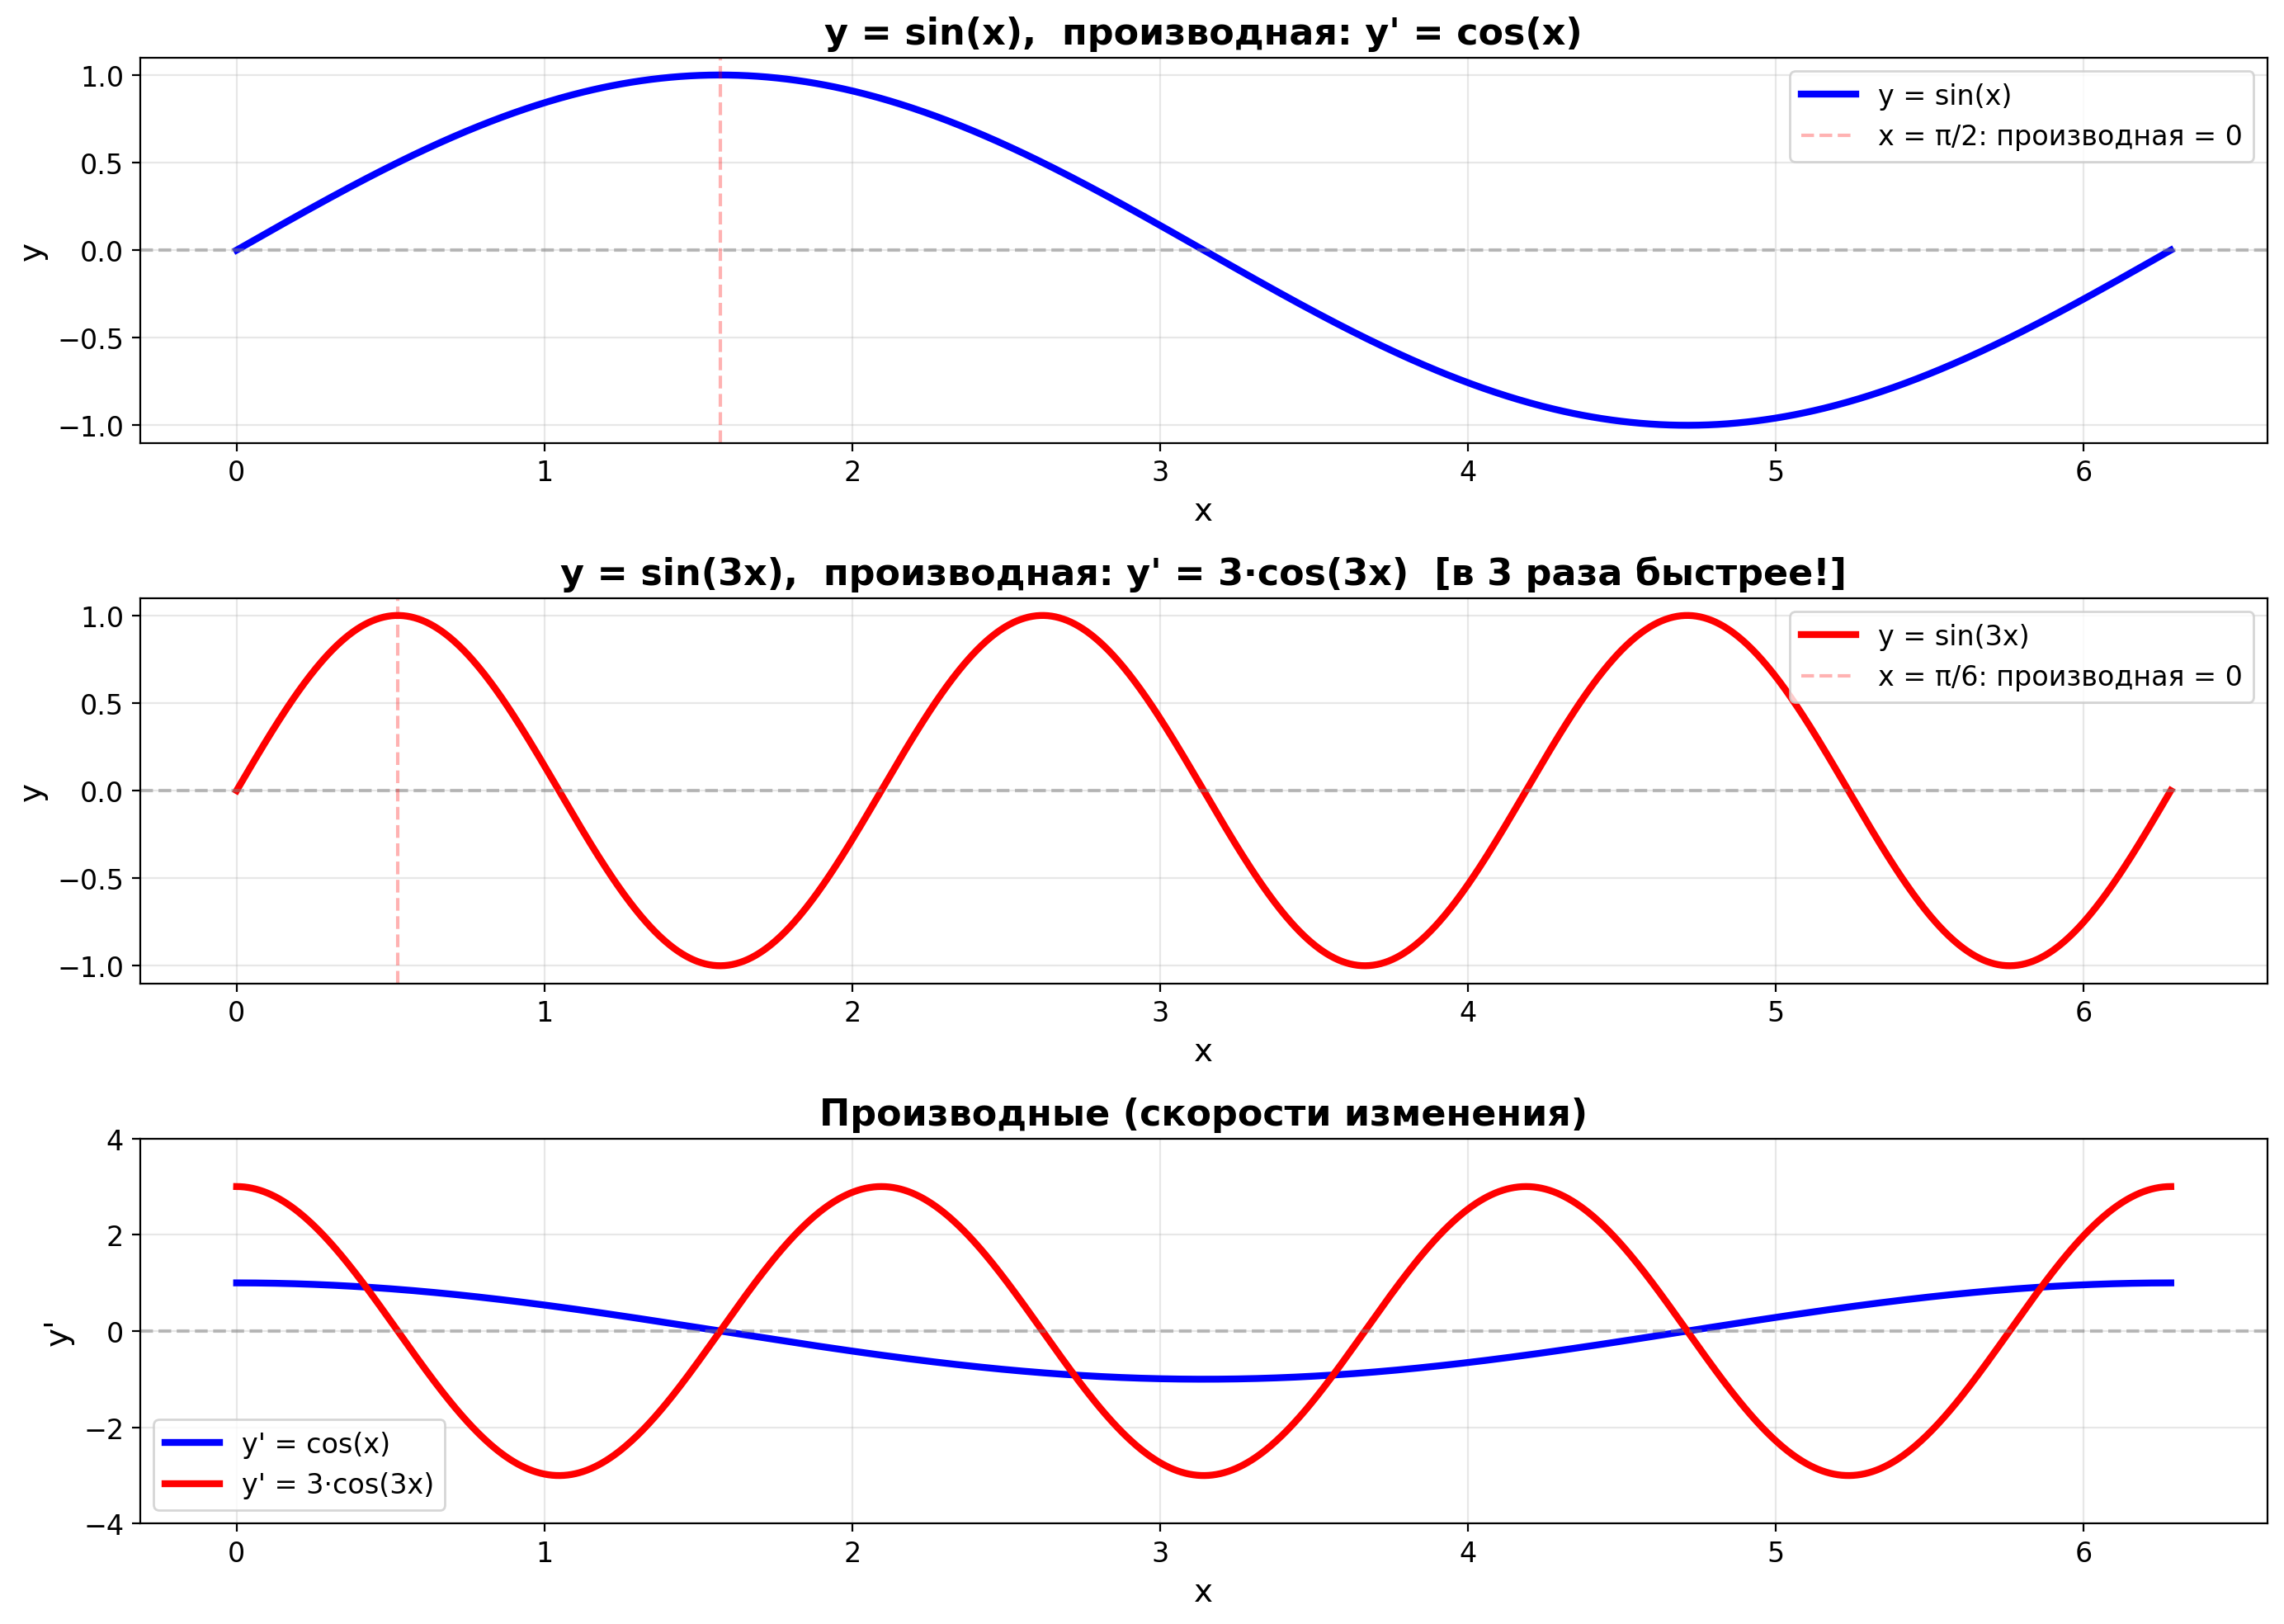

ПРИМЕР 2: y = sin(3x)

Композиция:
  u = g(x) = 3x
  y = f(u) = sin(u)

Производные:
  g'(x) = 3
  f'(u) = cos(u)

Chain rule:
  dy/dx = cos(3x) · 3 = 3·cos(3x)

Интуиция:
  Аргумент растёт в 3 раза быстрее
  → Синус колеблется в 3 раза быстрее!
  → Производная в 3 раза больше!



In [4]:
# Визуализация: sin(x) vs sin(3x)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10))

x_vals = np.linspace(0, 2*np.pi, 1000)

# График 1: sin(x)
ax1.plot(x_vals, np.sin(x_vals), 'b-', linewidth=3, label='y = sin(x)')
ax1.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(np.pi/2, color='red', linestyle='--', alpha=0.3, label='x = π/2: производная = 0')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_title("y = sin(x),  производная: y' = cos(x)", fontsize=16, fontweight='bold')
ax1.legend(fontsize=12)

# График 2: sin(3x)
ax2.plot(x_vals, np.sin(3*x_vals), 'r-', linewidth=3, label='y = sin(3x)')
ax2.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax2.axvline(np.pi/6, color='red', linestyle='--', alpha=0.3, label='x = π/6: производная = 0')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_title("y = sin(3x),  производная: y' = 3·cos(3x)  [в 3 раза быстрее!]", 
              fontsize=16, fontweight='bold')
ax2.legend(fontsize=12)

# График 3: Производные
ax3.plot(x_vals, np.cos(x_vals), 'b-', linewidth=3, label="y' = cos(x)")
ax3.plot(x_vals, 3*np.cos(3*x_vals), 'r-', linewidth=3, label="y' = 3·cos(3x)")
ax3.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax3.grid(True, alpha=0.3)
ax3.set_xlabel('x', fontsize=14)
ax3.set_ylabel("y'", fontsize=14)
ax3.set_title('Производные (скорости изменения)', fontsize=16, fontweight='bold')
ax3.legend(fontsize=12)
ax3.set_ylim(-4, 4)

plt.tight_layout()
plt.show()

print("="*70)
print("ПРИМЕР 2: y = sin(3x)")
print("="*70)
print()
print("Композиция:")
print("  u = g(x) = 3x")
print("  y = f(u) = sin(u)")
print()
print("Производные:")
print("  g'(x) = 3")
print("  f'(u) = cos(u)")
print()
print("Chain rule:")
print("  dy/dx = cos(3x) · 3 = 3·cos(3x)")
print()
print("Интуиция:")
print("  Аргумент растёт в 3 раза быстрее")
print("  → Синус колеблется в 3 раза быстрее!")
print("  → Производная в 3 раза больше!")
print()
print("="*70)


---

## 💡 Пример 3: $y = e^{x^2}$

### Разбор:

**Композиция:**
- Внутренняя функция: $u = g(x) = x^2$
- Внешняя функция: $y = f(u) = e^u$

**Производные:**
- $g'(x) = 2x$
- $f'(u) = e^u$

**Chain rule:**
$$\frac{dy}{dx} = f'(g(x)) \cdot g'(x) = e^{x^2} \cdot 2x = 2x \cdot e^{x^2}$$

---

### Геометрическая интуиция:

График $y = e^{x^2}$ растёт **гораздо быстрее** чем $e^x$!

Почему? Когда $x$ большой:
- Внутренняя функция $x^2$ растёт быстро (коэффициент $2x$)
- Экспонента усиливает это ещё больше (коэффициент $e^{x^2}$)
- Результат: **взрывной рост**!


<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:22: SyntaxWarning: invalid escape sequence '\c'
/var/folders/zk/wc07fm1d6sx_8362cmm1sh1xybjh0x/T/ipykernel_42573/420085817.py:22: SyntaxWarning: invalid escape sequence '\c'
  ax2.plot(x_vals, y_vals_exp_x2, 'r-', linewidth=3, label="$y' = 2x \cdot e^{x^2}$")


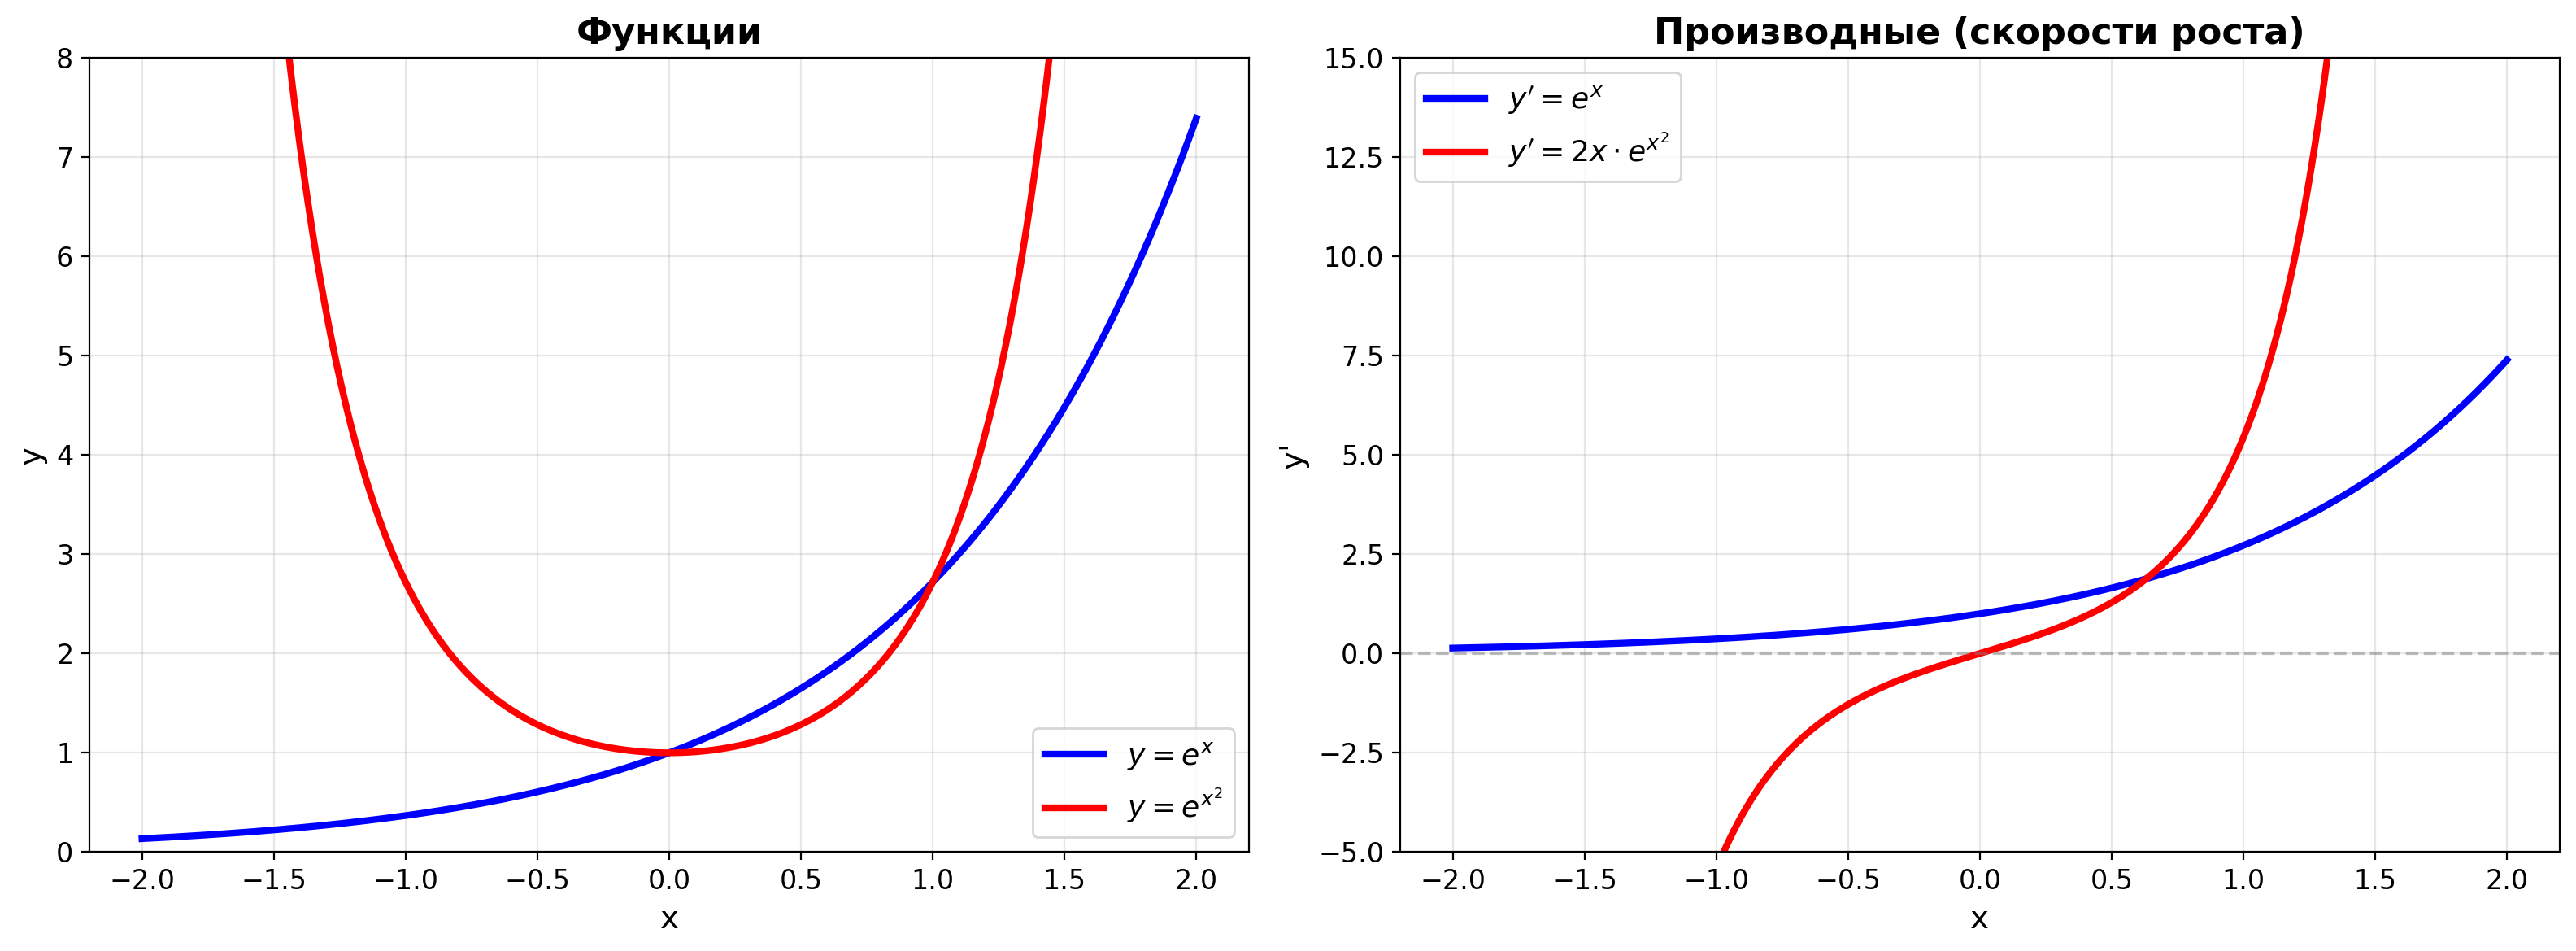

ПРИМЕР 3: y = e^(x²)

Композиция:
  u = g(x) = x²
  y = f(u) = e^u

Производные:
  g'(x) = 2x
  f'(u) = e^u = e^(x²)

Chain rule:
  dy/dx = e^(x²) · 2x = 2x·e^(x²)

Интуиция:
  При x = 2:
    - Внутренность x² растёт со скоростью 2x = 4
    - Экспонента усиливает: e^(x²) = e^4 ≈ 54.6
    - Общая скорость: 4 × 54.6 ≈ 218 (!!)

  → Взрывной рост!


Численная проверка при x = 2:
  Численно:   dy/dx ≈ 218.44
  По формуле: dy/dx = 2·2·e^4 = 218.39
  Разница: 0.049146



In [5]:
# Визуализация: e^x vs e^(x^2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

x_vals = np.linspace(-2, 2, 1000)

# График 1: Функции
ax1.plot(x_vals, np.exp(x_vals), 'b-', linewidth=3, label='$y = e^x$')
ax1.plot(x_vals, np.exp(x_vals**2), 'r-', linewidth=3, label='$y = e^{x^2}$')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_title('Функции', fontsize=16, fontweight='bold')
ax1.legend(fontsize=13)
ax1.set_ylim(0, 8)

# График 2: Производные
y_vals_exp = np.exp(x_vals)
y_vals_exp_x2 = 2*x_vals * np.exp(x_vals**2)

ax2.plot(x_vals, y_vals_exp, 'b-', linewidth=3, label="$y' = e^x$")
ax2.plot(x_vals, y_vals_exp_x2, 'r-', linewidth=3, label="$y' = 2x \cdot e^{x^2}$")
ax2.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel("y'", fontsize=14)
ax2.set_title('Производные (скорости роста)', fontsize=16, fontweight='bold')
ax2.legend(fontsize=13)
ax2.set_ylim(-5, 15)

plt.tight_layout()
plt.show()

print("="*70)
print("ПРИМЕР 3: y = e^(x²)")
print("="*70)
print()
print("Композиция:")
print("  u = g(x) = x²")
print("  y = f(u) = e^u")
print()
print("Производные:")
print("  g'(x) = 2x")
print("  f'(u) = e^u = e^(x²)")
print()
print("Chain rule:")
print("  dy/dx = e^(x²) · 2x = 2x·e^(x²)")
print()
print("Интуиция:")
print("  При x = 2:")
print("    - Внутренность x² растёт со скоростью 2x = 4")
print("    - Экспонента усиливает: e^(x²) = e^4 ≈ 54.6")
print("    - Общая скорость: 4 × 54.6 ≈ 218 (!!)")
print()
print("  → Взрывной рост!")
print()
print("="*70)

# Численная проверка
x_test = 2
dx_test = 0.0001

y_at_x = np.exp(x_test**2)
y_at_x_dx = np.exp((x_test + dx_test)**2)
dy_numerical = (y_at_x_dx - y_at_x) / dx_test

dy_dx_formula = 2 * x_test * np.exp(x_test**2)

print()
print("Численная проверка при x = 2:")
print(f"  Численно:   dy/dx ≈ {dy_numerical:.2f}")
print(f"  По формуле: dy/dx = 2·2·e^4 = {dy_dx_formula:.2f}")
print(f"  Разница: {abs(dy_numerical - dy_dx_formula):.6f}")
print()
print("="*70)


---

## 🌊 Геометрическая визуализация цепочки

Представь графики функций $u(x)$ и $y(u)$:

### Что происходит при малом сдвиге $dx$?

1. **График $u = g(x)$:** 
   - Сдвигаем $x$ на $dx$ по горизонтали
   - График сдвигается по вертикали на $du = g'(x) \cdot dx$

2. **График $y = f(u)$:**
   - Величина $du$ становится горизонтальным сдвигом для этого графика
   - График сдвигается по вертикали на $dy = f'(u) \cdot du$

3. **Итого:**
   $$dy = f'(u) \cdot du = f'(u) \cdot g'(x) \cdot dx$$
   
   Поэтому:
   $$\frac{dy}{dx} = f'(u) \cdot g'(x)$$


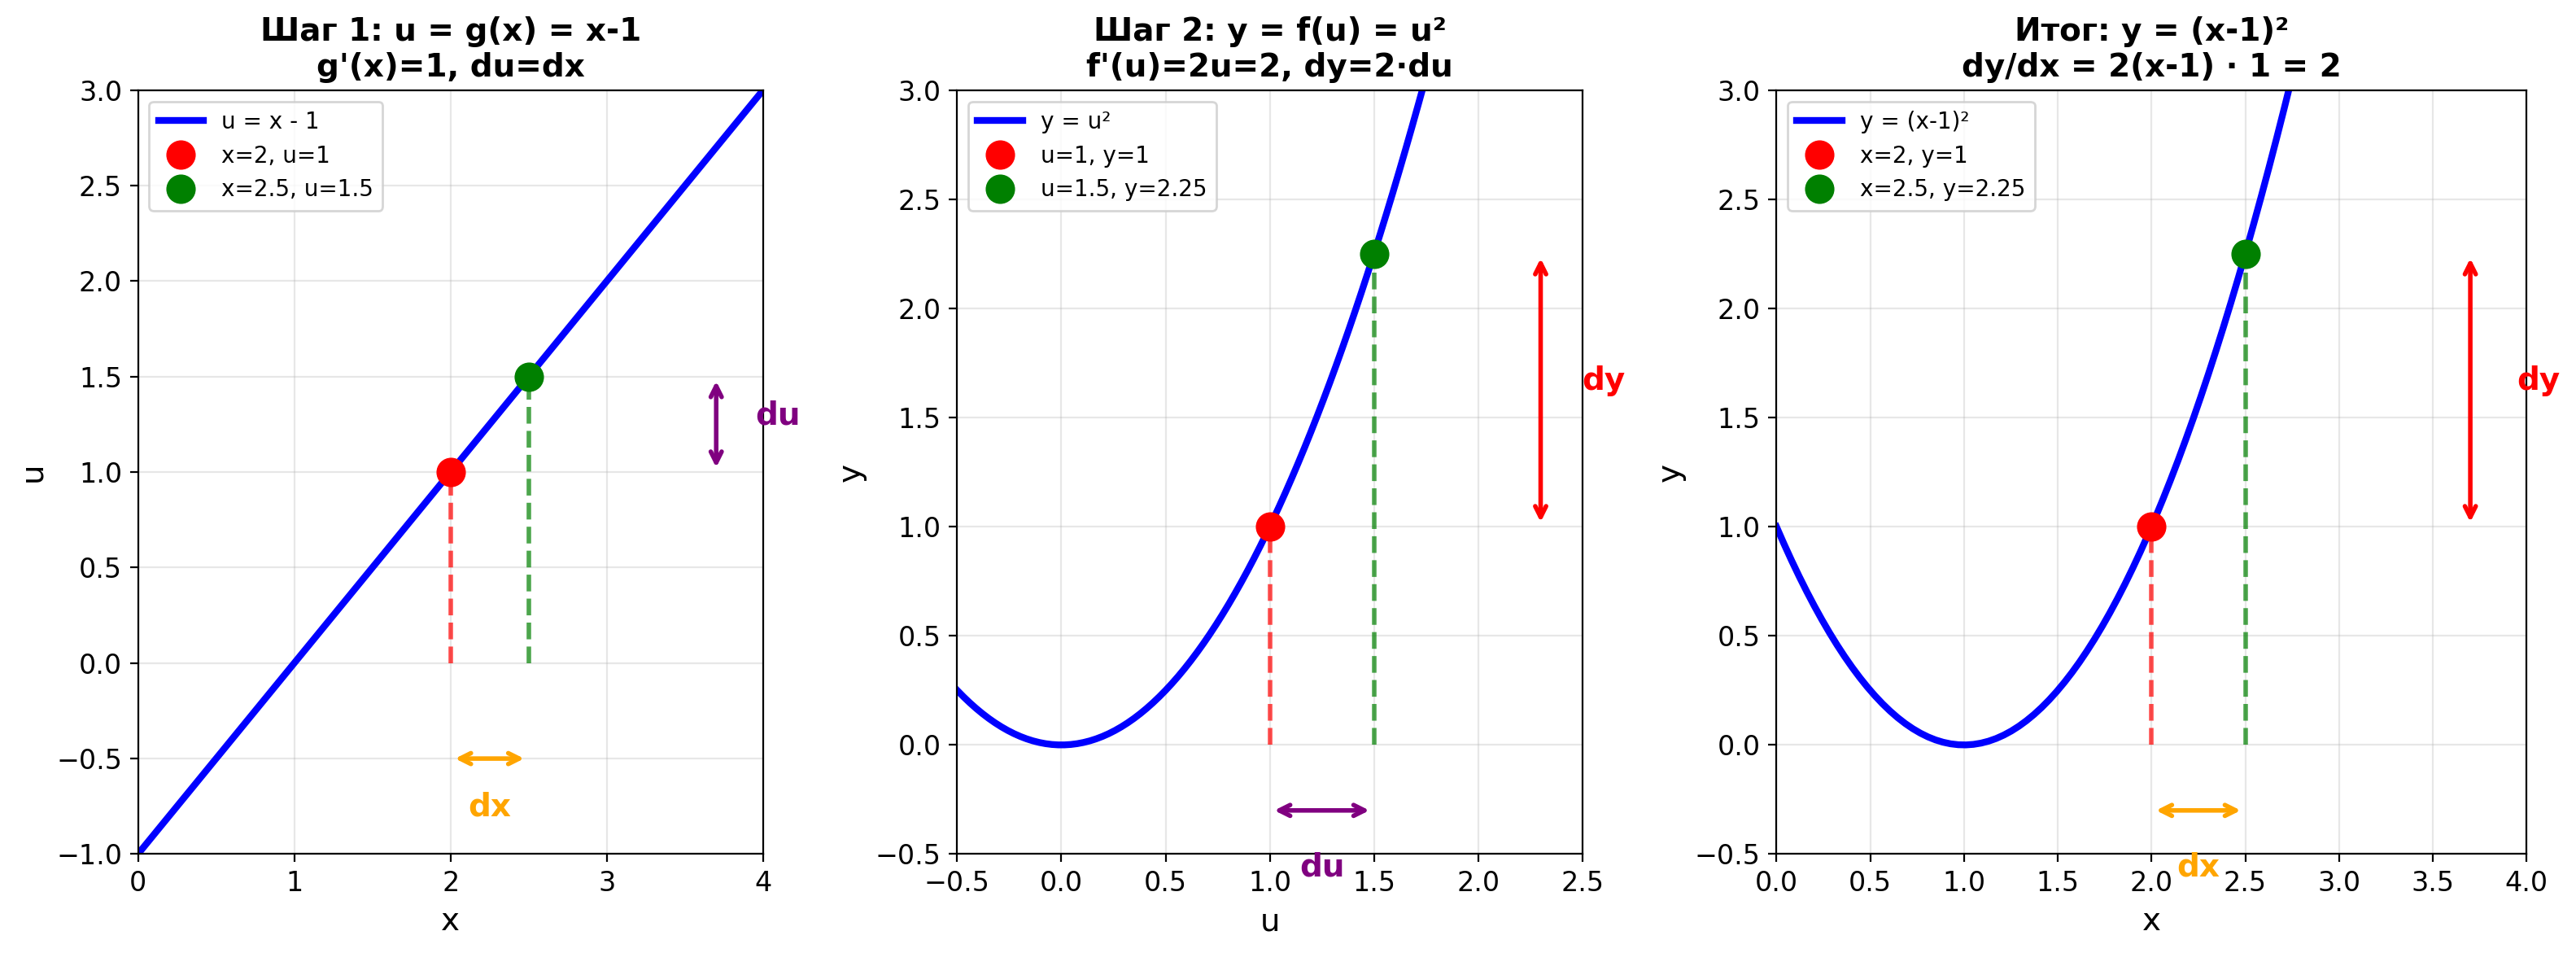

ГЕОМЕТРИЧЕСКАЯ ВИЗУАЛИЗАЦИЯ

Точка: x = 2, сдвиг: dx = 0.5

Шаг 1: u = x-1
  u = 2 - 1 = 1
  du = g'(x)·dx = 1·0.5 = 0.5

Шаг 2: y = u²
  y = 1² = 1
  dy = f'(u)·du = 2·1·0.5 = 1.0

Chain rule:
  dy/dx = f'(u)·g'(x) = 2u·1 = 2·1 = 2



In [6]:
# Визуализация геометрии chain rule

fig = plt.figure(figsize=(16, 6))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1.2])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

# Пример: y = (x-1)^2, но рассмотрим как композицию u = x-1, y = u^2
x_point = 2
dx_nudge = 0.5

# График 1: u = x - 1
x_range = np.linspace(0, 4, 100)
u_range = x_range - 1

ax1.plot(x_range, u_range, 'b-', linewidth=3, label='u = x - 1')
ax1.plot([x_point, x_point], [0, x_point-1], 'r--', linewidth=2, alpha=0.7)
ax1.plot([x_point+dx_nudge, x_point+dx_nudge], [0, x_point+dx_nudge-1], 'g--', 
         linewidth=2, alpha=0.7)
ax1.plot(x_point, x_point-1, 'ro', markersize=12, label=f'x={x_point}, u={x_point-1}')
ax1.plot(x_point+dx_nudge, x_point+dx_nudge-1, 'go', markersize=12, 
         label=f'x={x_point+dx_nudge}, u={x_point+dx_nudge-1}')

# Стрелки для dx и du
du_val = 1 * dx_nudge  # g'(x) = 1
ax1.annotate('', xy=(x_point, -0.5), xytext=(x_point+dx_nudge, -0.5),
            arrowprops=dict(arrowstyle='<->', lw=2, color='orange'))
ax1.text((2*x_point+dx_nudge)/2, -0.8, 'dx', fontsize=14, ha='center', 
         fontweight='bold', color='orange')

ax1.annotate('', xy=(3.7, x_point-1), xytext=(3.7, x_point+dx_nudge-1),
            arrowprops=dict(arrowstyle='<->', lw=2, color='purple'))
ax1.text(3.95, (2*x_point+dx_nudge-2)/2, 'du', fontsize=14, ha='left', 
         fontweight='bold', color='purple')

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('u', fontsize=14)
ax1.set_title("Шаг 1: u = g(x) = x-1\ng'(x)=1, du=dx", fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_xlim(0, 4)
ax1.set_ylim(-1, 3)

# График 2: y = u^2
u_range2 = np.linspace(-0.5, 2.5, 100)
y_range2 = u_range2**2

u_val = x_point - 1
u_val_new = x_point + dx_nudge - 1

ax2.plot(u_range2, y_range2, 'b-', linewidth=3, label='y = u²')
ax2.plot([u_val, u_val], [0, u_val**2], 'r--', linewidth=2, alpha=0.7)
ax2.plot([u_val_new, u_val_new], [0, u_val_new**2], 'g--', linewidth=2, alpha=0.7)
ax2.plot(u_val, u_val**2, 'ro', markersize=12, label=f'u={u_val}, y={u_val**2}')
ax2.plot(u_val_new, u_val_new**2, 'go', markersize=12, 
         label=f'u={u_val_new}, y={u_val_new**2}')

# Стрелки для du и dy
dy_val = 2 * u_val * du_val  # f'(u) = 2u
ax2.annotate('', xy=(u_val, -0.3), xytext=(u_val_new, -0.3),
            arrowprops=dict(arrowstyle='<->', lw=2, color='purple'))
ax2.text((u_val+u_val_new)/2, -0.6, 'du', fontsize=14, ha='center', 
         fontweight='bold', color='purple')

ax2.annotate('', xy=(2.3, u_val**2), xytext=(2.3, u_val_new**2),
            arrowprops=dict(arrowstyle='<->', lw=2, color='red'))
ax2.text(2.5, (u_val**2 + u_val_new**2)/2, 'dy', fontsize=14, ha='left', 
         fontweight='bold', color='red')

ax2.grid(True, alpha=0.3)
ax2.set_xlabel('u', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_title(f"Шаг 2: y = f(u) = u²\nf'(u)=2u=2, dy=2·du", fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.set_xlim(-0.5, 2.5)
ax2.set_ylim(-0.5, 3)

# График 3: Итоговая композиция y = (x-1)^2
x_range3 = np.linspace(0, 4, 100)
y_range3 = (x_range3 - 1)**2

ax3.plot(x_range3, y_range3, 'b-', linewidth=3, label='y = (x-1)²')
ax3.plot([x_point, x_point], [0, (x_point-1)**2], 'r--', linewidth=2, alpha=0.7)
ax3.plot([x_point+dx_nudge, x_point+dx_nudge], [0, (x_point+dx_nudge-1)**2], 
         'g--', linewidth=2, alpha=0.7)
ax3.plot(x_point, (x_point-1)**2, 'ro', markersize=12, 
         label=f'x={x_point}, y={(x_point-1)**2}')
ax3.plot(x_point+dx_nudge, (x_point+dx_nudge-1)**2, 'go', markersize=12, 
         label=f'x={x_point+dx_nudge}, y={(x_point+dx_nudge-1)**2:.2f}')

# Стрелки
ax3.annotate('', xy=(x_point, -0.3), xytext=(x_point+dx_nudge, -0.3),
            arrowprops=dict(arrowstyle='<->', lw=2, color='orange'))
ax3.text((2*x_point+dx_nudge)/2, -0.6, 'dx', fontsize=14, ha='center', 
         fontweight='bold', color='orange')

ax3.annotate('', xy=(3.7, (x_point-1)**2), xytext=(3.7, (x_point+dx_nudge-1)**2),
            arrowprops=dict(arrowstyle='<->', lw=2, color='red'))
ax3.text(3.95, ((x_point-1)**2 + (x_point+dx_nudge-1)**2)/2, 'dy', fontsize=14, 
         ha='left', fontweight='bold', color='red')

ax3.grid(True, alpha=0.3)
ax3.set_xlabel('x', fontsize=14)
ax3.set_ylabel('y', fontsize=14)
ax3.set_title("Итог: y = (x-1)²\ndy/dx = 2(x-1) · 1 = 2", fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.set_xlim(0, 4)
ax3.set_ylim(-0.5, 3)

plt.tight_layout()
plt.show()

print("="*70)
print("ГЕОМЕТРИЧЕСКАЯ ВИЗУАЛИЗАЦИЯ")
print("="*70)
print()
print(f"Точка: x = {x_point}, сдвиг: dx = {dx_nudge}")
print()
print(f"Шаг 1: u = x-1")
print(f"  u = {x_point} - 1 = {u_val}")
print(f"  du = g'(x)·dx = 1·{dx_nudge} = {du_val}")
print()
print(f"Шаг 2: y = u²")
print(f"  y = {u_val}² = {u_val**2}")
print(f"  dy = f'(u)·du = 2·{u_val}·{du_val} = {2*u_val*du_val}")
print()
print(f"Chain rule:")
print(f"  dy/dx = f'(u)·g'(x) = 2u·1 = 2·{u_val} = {2*u_val}")
print()
print("="*70)


---

## 📋 Резюме

### Формула Chain Rule:

$$\boxed{\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx} = f'(g(x)) \cdot g'(x)}$$

---

### 🎯 Интуиция:

**Коэффициенты изменения перемножаются!**

Если $x$ изменяется → $u$ изменяется в $g'(x)$ раз быстрее → $y$ изменяется в $f'(u)$ раз быстрее

Итого: $y$ изменяется в $[f'(u) \times g'(x)]$ раз быстрее чем $x$

---

### 📐 Доказательство:

1. По определению: $\frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{\Delta y}{\Delta x}$

2. Умножим и разделим на $\Delta u$: $\frac{\Delta y}{\Delta x} = \frac{\Delta y}{\Delta u} \cdot \frac{\Delta u}{\Delta x}$

3. Переходим к пределу: $\frac{dy}{dx} = \lim_{\Delta u \to 0} \frac{\Delta y}{\Delta u} \cdot \lim_{\Delta x \to 0} \frac{\Delta u}{\Delta x} = \frac{dy}{du} \cdot \frac{du}{dx}$

---

### 💡 Примеры:

| Функция | Композиция | Производная |
|---------|------------|-------------|
| $(x^2+1)^{10}$ | $u=x^2+1$, $y=u^{10}$ | $20x(x^2+1)^9$ |
| $\sin(3x)$ | $u=3x$, $y=\sin u$ | $3\cos(3x)$ |
| $e^{x^2}$ | $u=x^2$, $y=e^u$ | $2xe^{x^2}$ |
| $\sqrt{1+x^2}$ | $u=1+x^2$, $y=\sqrt{u}$ | $\frac{x}{\sqrt{1+x^2}}$ |

---

### 🔑 Ключевая идея:

**Chain rule — это просто правило перемножения скоростей изменения в цепочке функций!**

Как в физике: если A движется в 2 раза быстрее B, а C движется в 3 раза быстрее A, то C движется в 2×3=6 раз быстрее B!
